In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter
from scipy import stats

import numpy as np
import ast,json,glob,os


In [28]:
from matplotlib.offsetbox import bbox_artist


def load_df(fname):
    df = pd.read_csv(fname)
    
    df["SN Undiagnosed"] = df["SN Untreated chronic"].values + df["SN Untreated acute"].values
    df["CN Undiagnosed"] = df["CN Untreated chronic"].values + df["CN Untreated acute"].values
    
    df["SN sample size"] = [len(ast.literal_eval(x)) - len(ast.literal_eval(y)) for x,y in zip(df["SN sampled"],df["SN seed"])] #df.apply(lambda x: x["SN sampled"].len())
    df["CN sample size"] = [len(ast.literal_eval(x)) - len(ast.literal_eval(y)) for x,y in zip(df["CN sampled"],df["CN seed"])]
    
    return df


def get_confidence_intervals(raw_data):
    # raw_data is a list of counts
    raw_data = list(raw_data)
    vals = list(set(raw_data))
    probs = []
    for v in vals:
        probs.append(raw_data.count(v)/len(raw_data))
    custom_dist = scipy.stats.rv_discrete(values=(vals,probs))
    interval = custom_dist.interval(0.95)
    return np.median(vals),interval


def plot_gn_tn(fname,savename,plotylim):
    df = load_df(fname)
    # Plot 1
    box=df.boxplot(column=["SN GN count","CN GN count","SN TN count","CN TN count"],positions=[1,2,3,4],patch_artist=True,medianprops=dict(color="k"),whiskerprops=dict(color="k"),capprops=dict(color="k"),notch=True,return_type='both')
    colors = ['blue','red','blue','red']
    for patch,color in zip(box[1]["boxes"],colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("k")
    plt.ylim(plotylim)
    plt.ylabel("Number of pairs")
    plt.xticks(ticks=[1,2,3,4], labels=["SNS GN","SPCT GN","SNS TN","SPCT TN"])
    # Create custom handles for the legend
    handle1 = mpatches.Patch(color='b', label='SNS')
    handle2 = mpatches.Patch(color='r', label='SPCT')
    plt.legend(handles=[handle1, handle2])
    try:
        plt.savefig(savename,bbox_inches="tight", dpi=600)
    except:
        plt.savefig(savename,bbox_inches="tight")
    plt.show()


def plot_comps(fname,savename,tag="orig"):
    df = load_df(fname)
    # Plot 2
    box = df.boxplot(column=["SN sample size","SN HIV+","SN Out-of-care","SN Undiagnosed"],patch_artist=True,medianprops=dict(color="k"),whiskerprops=dict(color="k"),capprops=dict(color="k"),boxprops=dict(color="b"),notch=True,return_type="both")
    df.boxplot(column=["CN sample size","CN HIV+","CN Out-of-care","CN Undiagnosed"],patch_artist=True,medianprops=dict(color="k"),whiskerprops=dict(color="k"),flierprops=dict(color="k"),meanprops=dict(color="k"),capprops=dict(color="k"),boxprops=dict(color="r"),notch=True,ax=box[0])
    plt.xticks(ticks=[1,2,3,4], labels=["Sample","PLWH","OoC","UD"])
    plt.ylim([0,625])
    if tag=="orig":
        plt.text(1,550,"100%")
        plt.text(1,75,"100%")
        plt.text(2,300,"47.5%")
        plt.text(2,50,"48.4%")
        plt.text(3,210,"29.4%")
        plt.text(3,40,"29.0%")
        plt.text(4,60,"5.9%")
        plt.text(4.25,8,"6.5%")
    elif tag=="contact":
        plt.text(1,550,"100%")
        plt.text(1,100,"100%")
        plt.text(2,300,"47.8%")
        plt.text(2,60,"50.0%")
        plt.text(3,210,"29.8%")
        plt.text(3,40,"31.0%")
        plt.text(4,60,"5.9%")
        plt.text(4.25,8,"7.1%")

    plt.ylabel("Number of individuals")
    # Create custom handles for the legend
    handle1 = mpatches.Patch(color='b', label='SNS')
    handle2 = mpatches.Patch(color='r', label='SPCT')
    plt.legend(handles=[handle1, handle2])
    try:
        plt.savefig(savename,bbox_inches="tight", dpi=600)
    except:
        plt.savefig(savename,bbox_inches="tight")
    plt.show()

def boxplots(fname,savename1,savename2,plot1ylim=(0,40),tag="orig"):
    plot_gn_tn(fname,savename1,plot1ylim)
    plot_comps(fname,savename2,tag=tag)
    

def percentages(fname):
    df = load_df(fname)
    print("Number of rows with NaN: {}".format(df.shape[0] - df.dropna().shape[0]))
    df = df.dropna()
    SNdenom = np.median(df["SN sample size"].values)
    CNdenom = np.median(df["CN sample size"].values)
    SNhiv = np.median(df["SN HIV+"].values)
    CNhiv = np.median(df["CN HIV+"].values)
    SNooc = np.median(df["SN Out-of-care"].values)
    CNooc = np.median(df["CN Out-of-care"].values)
    SNud = np.median(df["SN Undiagnosed"].values)
    CNud = np.median(df["CN Undiagnosed"].values)
    props = {"SNS sample size" : SNdenom, "SPCT sample size" : CNdenom, "SNS PLWH" : SNhiv/SNdenom,"SNS OoC" : SNooc/SNdenom,"SNS UD" : SNud/SNdenom,"SPCT PLWH" : CNhiv/CNdenom,"SPCT OoC" : CNooc/CNdenom,"SPCT UD" : CNud/CNdenom}
    return props
    


In [30]:
fname = "results_trimmed_end/JOB758832/all_summaries_20221031.csv"
df = load_df(fname)
vals = df["SN sample size"].values
median,confint = get_confidence_intervals(vals)
print("{}, {}".format(median,confint))


0.0
540.5, (538.0, 543.0)


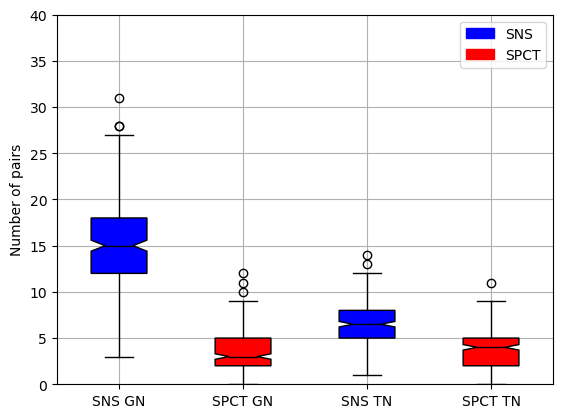

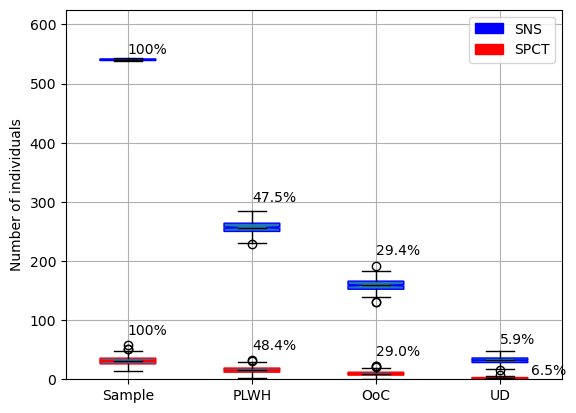

Number of rows with NaN: 0
SNS sample size: 540.0
SPCT sample size: 31.0
SNS PLWH: 0.475
SNS OoC: 0.29444444444444445
SNS UD: 0.05925925925925926
SPCT PLWH: 0.4838709677419355
SPCT OoC: 0.2903225806451613
SPCT UD: 0.06451612903225806


In [21]:
fname = "results_trimmed_end/JOB758832/all_summaries_20221031.csv"
boxplots(fname,"results_trimmed_end/JOB758832/gn_tn_edges_20221031_end.jpg","results_trimmed_end/JOB758832/compartments_20221031_end.jpg")
p_100 = percentages(fname)
for key,val in p_100.items():
    print(key+": "+str(val))

AttributeError: 'numpy.ndarray' object has no attribute 'count'

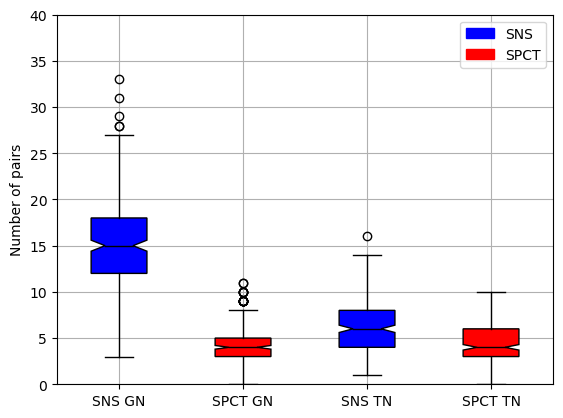

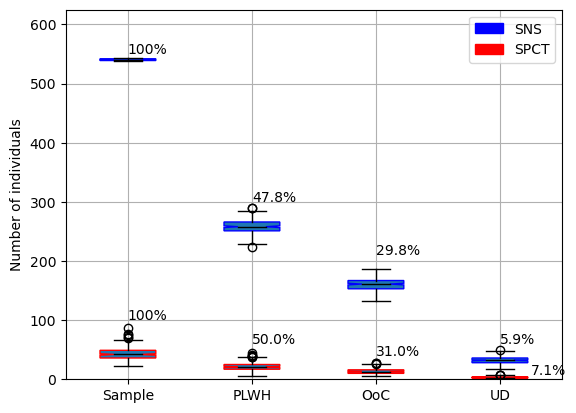

Number of rows with NaN: 0
SNS sample size: 540.0
SPCT sample size: 42.0
SNS PLWH: 0.4777777777777778
SNS OoC: 0.29814814814814816
SNS UD: 0.05925925925925926
SPCT PLWH: 0.5
SPCT OoC: 0.30952380952380953
SPCT UD: 0.07142857142857142


In [ ]:
fname = "results_trimmed_end/JOB758832_RDS_contact/all_summaries_20221031contact.csv"
boxplots(fname,"results_trimmed_end/JOB758832_RDS_contact/gn_tn_edges_20221031_end_contact.jpg","results_trimmed_end/JOB758832_RDS_contact/compartments_20221031_end_contact.jpg",tag="contact")
props_100 = percentages(fname)
for key,val in props_100.items():
    print(key+": "+str(val))

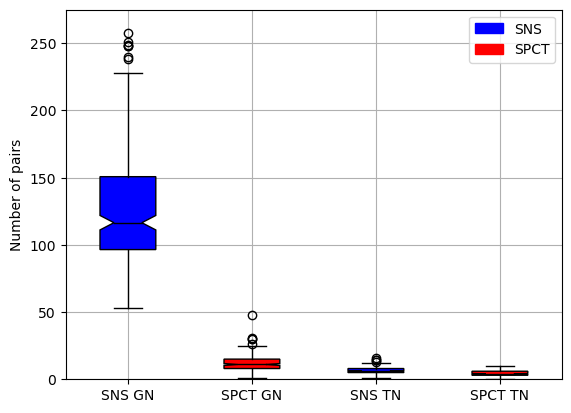

In [ ]:
fname = "results_trimmed_infection/JOB784278/all_summaries_20221118_infection.csv"
plot_gn_tn(fname,"results_trimmed_infection/JOB784278/gn_tn_edges_20221118_infection.jpg",plotylim=(0,275))

sensitivity_analysis_acceptance/acceptance00/all_summaries_20221120160058.csv
sensitivity_analysis_acceptance/acceptance02/all_summaries_20221120160746.csv
sensitivity_analysis_acceptance/acceptance04/all_summaries_20221120161907.csv
sensitivity_analysis_acceptance/acceptance06/all_summaries_20221120163504.csv
sensitivity_analysis_acceptance/acceptance08/all_summaries_20221120164621.csv
sensitivity_analysis_acceptance/acceptance10/all_summaries_20221120165242.csv


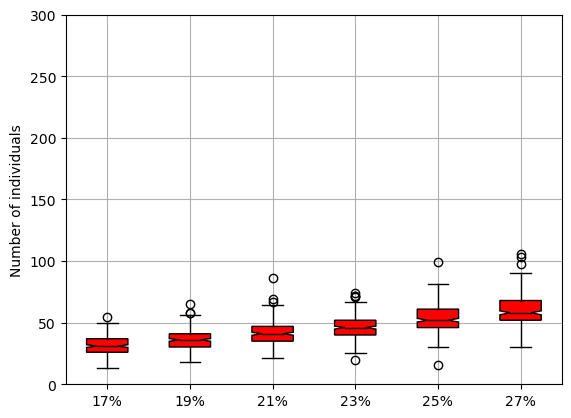

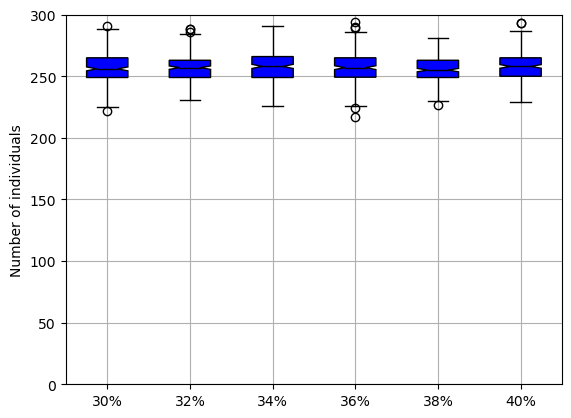

In [ ]:
f = lambda d : glob.glob(os.path.join(os.path.join("sensitivity_analysis_acceptance",d),"all_summaries*"))[0]
fnames = [f("acceptance00"),f("acceptance02"),f("acceptance04"),f("acceptance06"),f("acceptance08"),f("acceptance10")]
cn_nums = ["17%","19%","21%","23%","25%","27%"]
cn_size = pd.DataFrame()
sn_nums = list(reversed(["40%", "38%", "36%", "34%","32%","30%"]))
sn_hiv = pd.DataFrame()
for n,m,fname in zip(cn_nums,sn_nums,fnames):
    print(fname)
    # plot_comps(fname,os.path.join(os.path.split(fname)[0],"compartments_20221120.jpg"))
    df = load_df(fname)
    cn_size[n] = df["CN sample size"].values
    sn_hiv[m] = df["SN HIV+"].values
cn_size.boxplot(column=cn_nums,patch_artist=True,medianprops=dict(color="k"),whiskerprops=dict(color="k"),flierprops=dict(color="k"),meanprops=dict(color="k"),capprops=dict(color="k"),boxprops=dict(facecolor="r"),notch=True)
plt.ylabel("Number of individuals")
plt.ylim(0,300)
plt.savefig("sensitivity_analysis_acceptance/cn_size.jpg",bbox_inches="tight", dpi=600)
plt.show()
sn_hiv.boxplot(column=sn_nums,patch_artist=True,medianprops=dict(color="k"),whiskerprops=dict(color="k"),flierprops=dict(color="k"),meanprops=dict(color="k"),capprops=dict(color="k"),boxprops=dict(facecolor="b"),notch=True)
plt.ylabel("Number of individuals")
plt.ylim(0,300)
plt.savefig("sensitivity_analysis_acceptance/sn_hiv_pos.jpg",bbox_inches="tight", dpi=600)
plt.show()


In [ ]:
fname = "results_trimmed_75prevalence/JOB913797/all_summaries_75prevalence.csv"
# boxplots(fname,"results_trimmed_75prevalence/JOB913797/gn_tn_edges_20221219_75prevalence.jpg","results_trimmed_75prevalence/JOB913797/compartments_20221219_75prevalence.jpg")
props_75 = percentages(fname)
for key,val in props_75.items():
    print(key+": "+str(val))

Number of rows with NaN: 2
SNS sample size: 540.0
SPCT sample size: 30.0
SNS PLWH: 0.37407407407407406
SNS OoC: 0.22777777777777777
SNS UD: 0.05185185185185185
SPCT PLWH: 0.4666666666666667
SPCT OoC: 0.26666666666666666
SPCT UD: 0.06666666666666667


In [ ]:
fname = "results_trimmed_50prevalence/JOB916185/all_summaries_50prevalence_20221220.csv"
# boxplots(fname,"results_trimmed_50prevalence/JOB916185/gn_tn_edges_20221220_50prevalence.jpg","results_trimmed_50prevalence/JOB916185/compartments_20221220_50prevalence.jpg")
props_50 = percentages(fname)
for key,val in props_50.items():
    print(key+": "+str(val))


Number of rows with NaN: 0
SNS sample size: 540.0
SPCT sample size: 31.0
SNS PLWH: 0.25925925925925924
SNS OoC: 0.1527777777777778
SNS UD: 0.040740740740740744
SPCT PLWH: 0.3548387096774194
SPCT OoC: 0.1935483870967742
SPCT UD: 0.06451612903225806


In [ ]:
fname = "results_trimmed_25prevalence/JOB916621/all_summaries_25prevalence_20221221.csv"
# boxplots(fname,"results_trimmed_25prevalence/JOB916621/gn_tn_edges_20221221_25prevalence.jpg","results_trimmed_25prevalence/JOB916621/compartments_20221221_25prevalence.jpg")
props_25 = percentages(fname)
for key,val in props_25.items():
    print(key+": "+str(val))

Number of rows with NaN: 1
SNS sample size: 540.0
SPCT sample size: 28.0
SNS PLWH: 0.13518518518518519
SNS OoC: 0.07777777777777778
SNS UD: 0.024074074074074074
SPCT PLWH: 0.2857142857142857
SPCT OoC: 0.14285714285714285
SPCT UD: 0.07142857142857142


In [ ]:

def make_bar_prev(SNScol,SPCTcol,props_100,props_75,props_50,props_25,savename = "prevalence_plot.jpg"):
        # make bar graph from props_100, props_75, props_50, and props_25

        xticks = ["36.3%","27.2%","18.1%","9.1%"]

        # set height of bar to match xticks
        SNS = [props_100[SNScol],props_75[SNScol],props_50[SNScol],props_25[SNScol]]
        CT = [props_100[SPCTcol],props_75[SPCTcol],props_50[SPCTcol],props_25[SPCTcol]]

        # set width of bar
        barWidth = 0.25
        fig = plt.subplots(figsize =(12, 8))
        
        # Set position of bar on X axis
        br1 = np.arange(len(SNS))
        br2 = [x + barWidth for x in br1]

        
        # Make the plot
        plt.bar(br1, SNS, color ='b', width = barWidth,
                edgecolor ='k', label =SNScol)
        plt.bar(br2, CT, color ='r', width = barWidth,
                edgecolor ='k', label =SPCTcol)

        
        # Adding Xticks
        plt.xlabel('% HIV prevalence', fontsize = 16,fontweight='bold')
        plt.ylabel('Percentage of sampled population', fontsize = 16)
        plt.xticks([r + barWidth for r in range(len(SNS))],
                xticks)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylim([0,0.52])
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


        #make legend
        plt.legend(fontsize=16)

        # save figure
        try:
                plt.savefig(savename,bbox_inches="tight", dpi=600)
        except:
                plt.savefig(savename,bbox_inches="tight")

        plt.show()




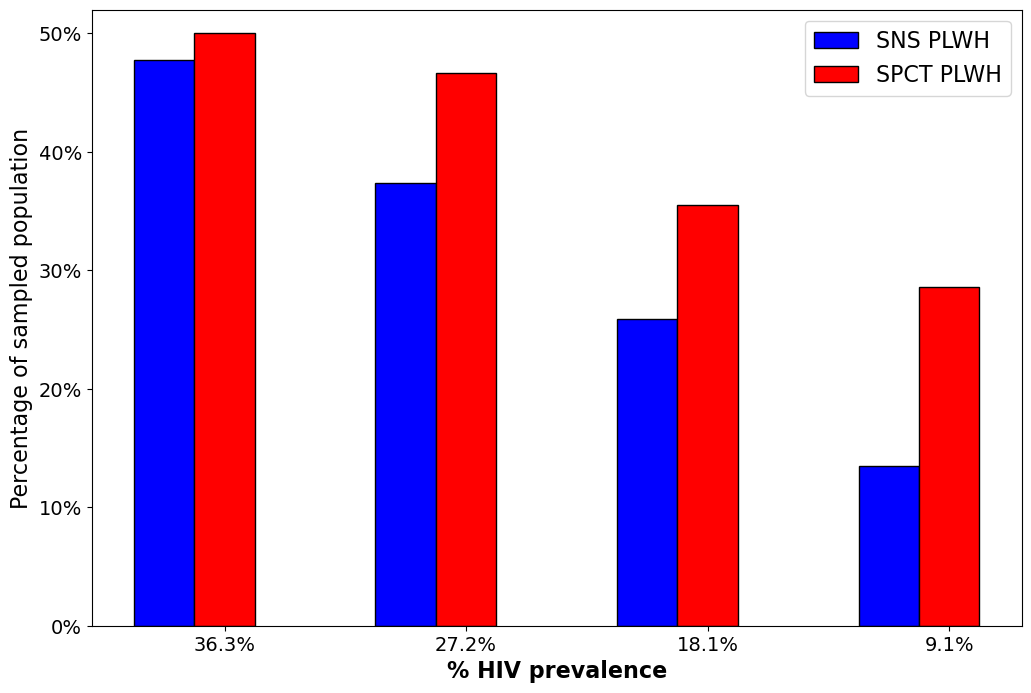

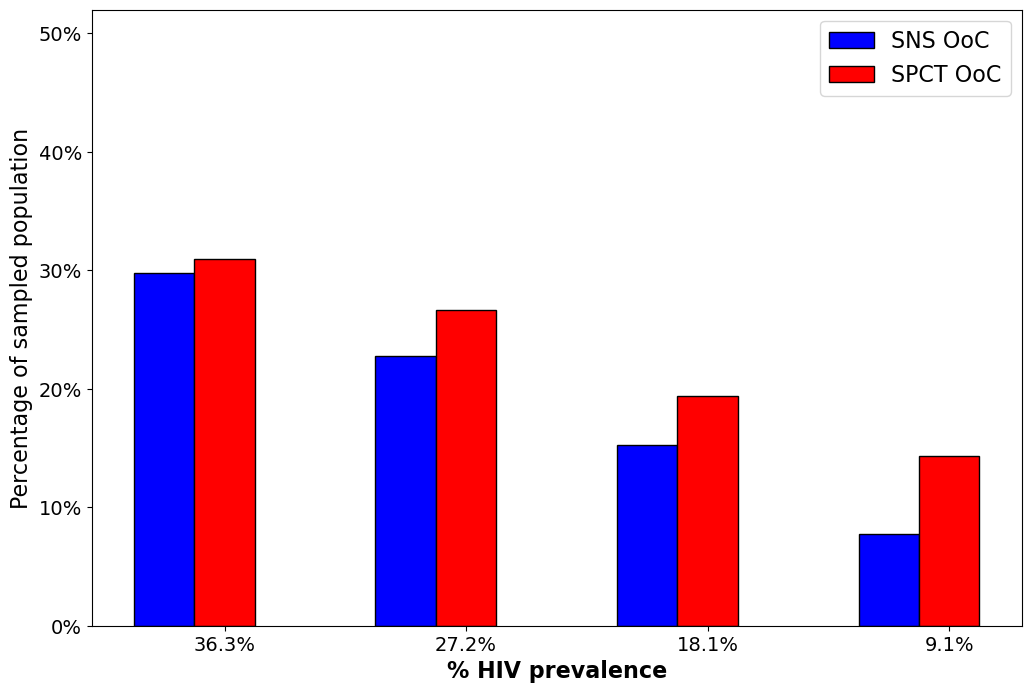

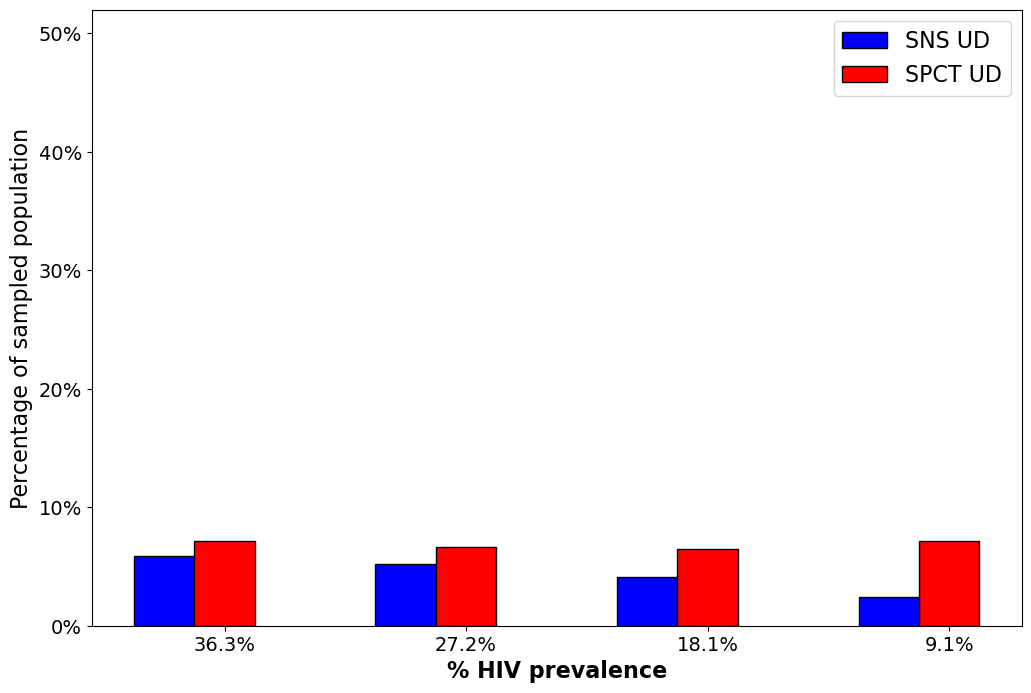

In [ ]:

SNScol = "SNS PLWH"
SPCTcol = "SPCT PLWH"
savename = "Fig5_panelA_prevalence_plot_PLWH.jpg"
make_bar_prev(SNScol,SPCTcol,props_100,props_75,props_50,props_25,savename = savename)

SNScol = "SNS OoC"
SPCTcol = "SPCT OoC"
savename = "Fig5_panelB_prevalence_plot_OoC.jpg"
make_bar_prev(SNScol,SPCTcol,props_100,props_75,props_50,props_25,savename = savename)


SNScol = "SNS UD"
SPCTcol = "SPCT UD"
savename = "Fig5_panelC_prevalence_plot_UD.jpg"
make_bar_prev(SNScol,SPCTcol,props_100,props_75,props_50,props_25,savename = savename)


# Visualize degree distribution

In [ ]:
def pad_deg_dist(deg_dict,small_prob, num_nodes):
    '''
    Given the nonzero values of a degree distribution, pad all remaining degree sizes with a small probability. 
    '''
    deg_dict = { int(k) : v for k,v in deg_dict.items() }
    deg_dist = []
    for k in range(num_nodes):
        if k not in deg_dict or (k in deg_dict and deg_dict[k] == 0):
            # need to avoid zero values in deg dist for computational reasons
            deg_dist.append(small_prob)
        else:
            deg_dist.append(deg_dict[k]+small_prob)
    return deg_dist

In [ ]:
social_deg_dist = {1: 0.0667,2: 0.11710000000000001,3: 0.1398,4: 0.0894,5: 0.1106,6: 0.048799999999999996,7: 0.026000000000000002,8: 0.021099999999999997,9: 0.006500000000000001,10: 0.0992,11: 0.0033,12: 0.0179,15: 0.043899999999999995,20: 0.056900000000000006,21: 0.0016,22: 0.0016,25: 0.013000000000000001,26: 0.0016,30: 0.029300000000000003,35: 0.006500000000000001,37: 0.0016,40: 0.011399999999999999,45: 0.0016,46: 0.0016,50: 0.029300000000000003,60: 0.0033,70: 0.0033,75: 0.0016,100: 0.0163,150: 0.0016,200: 0.0049,300: 0.0016,400: 0.0016,600: 0.0016}
padded_social_deg_dist= pad_deg_dist(social_deg_dist,1.e-10,601)
print(sum(padded_social_deg_dist))

contact_deg_dist = {0 : 0.089, 1 : 0.354, 2 : 0.189, 3 : 0.146, 4 : 0.089, 5 : 0.128, 6 : 0.005}
padded_contact_deg_dist = pad_deg_dist(contact_deg_dist,1.e-10,601)
print(sum(padded_contact_deg_dist))

0.9821000601000051
1.0000000601000048


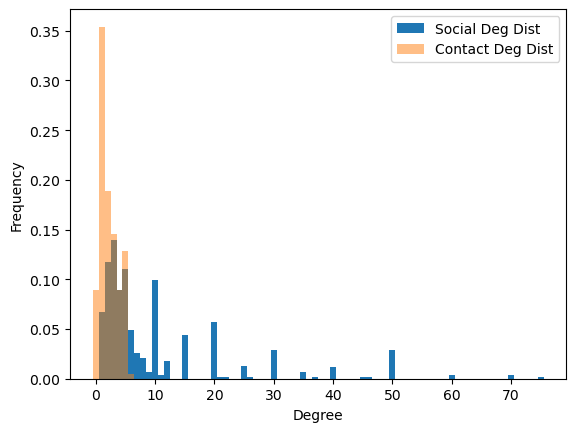

In [ ]:
# Create bar plots for the distributions
index=76
plt.bar(range(0,index), padded_social_deg_dist[:index], width=1, label='Social Deg Dist', alpha=1)
plt.bar(range(0,index), padded_contact_deg_dist[:index], width=1, label='Contact Deg Dist', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()



## Sensitivity Analysis on Contact Degree Distribution

In [ ]:
# contact_deg_dist_rightshift = {0 : 0.089, 1 : 0.354, 2 : 0.189, 3 : 0.146, 4 : 0.089, 5 : 0.1, 6:0.09, 7:0.08, 8:0.05, 9:0.04, 10:0.03}
# tot = sum(contact_deg_dist_rightshift.values())
# contact_deg_dist_rightshift = {k:v/tot for k,v in contact_deg_dist_rightshift.items()}
# data_rightshift = [contact_deg_dist_rightshift[k] for k in sorted(contact_deg_dist_rightshift)]

# contact_deg_dist_leftshift = {0 : 0.18, 1 : 0.7, 2 : 0.09, 3 : 0.07, 4 : 0.04, 5 : 0.02, 6 : 0.0, 7:0.00, 8:0, 9:0.000, 10:0}
# contact_deg_dist_leftshift = {k:v/tot for k,v in contact_deg_dist_older.items()}
# data_older = [contact_deg_dist_leftshift[k] for k in sorted(contact_deg_dist_older)]

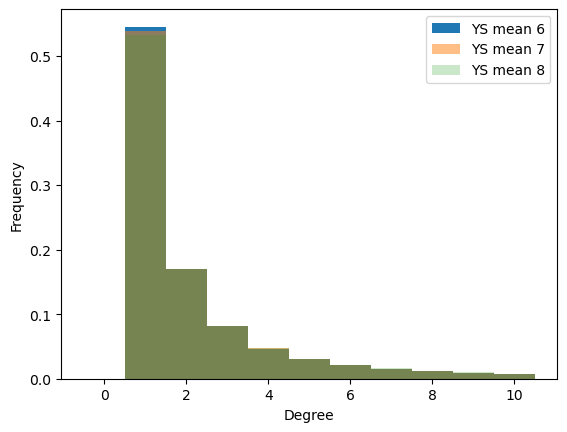

In [ ]:
from scipy.stats import yulesimon

mean6_alpha,mean7_alpha,mean8_alpha = 1.20, 1.17, 1.14 
x = range(0,11)
plt.bar(x, yulesimon.pmf(x,mean6_alpha), width=1, label='YS mean 6', alpha=1)
plt.bar(x, yulesimon.pmf(x,mean7_alpha), width=1, label='YS mean 7', alpha=0.5)
plt.bar(x, yulesimon.pmf(x,mean8_alpha), width=1, label='YS mean 8', alpha=0.25)


# Add labels, title, and legend
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()


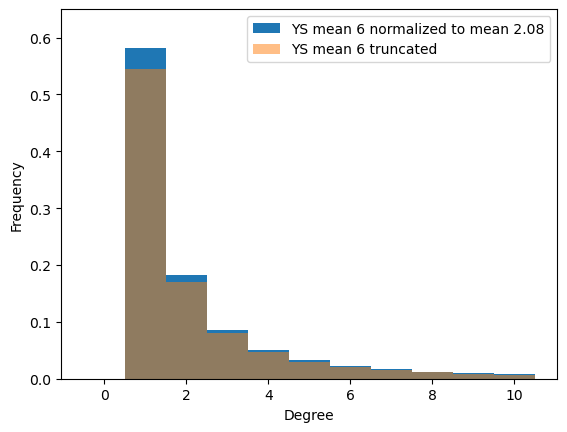

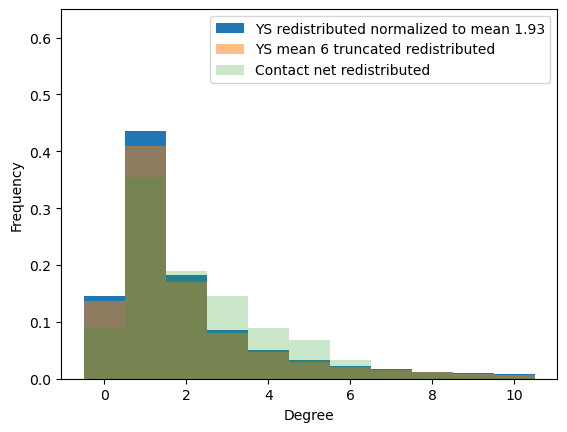

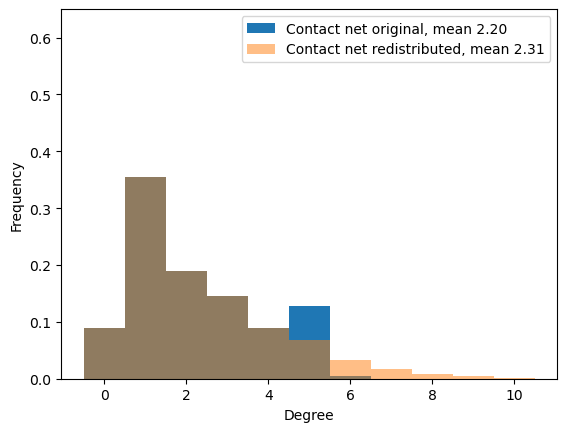

In [ ]:

# try Yule-Simon distribution, which people have used before
# disadvantage 1: zero probability of zero sexual partners
# disadvantage 2: very fat tail -- unrealistic number of hub nodes

x = range(0,11)
y = yulesimon.pmf(x,mean6_alpha)

# plot original Yule-Simon distribution with mean 6 
yn = y/sum(y)
plt.bar(x, yn, width=1, label='YS mean 6 normalized to mean {:.2f}'.format(sum(yn*x)), alpha=1)

# plot original Yule-Simon distribution with mean 6 
plt.bar(x, y, width=1, label='YS mean 6 truncated', alpha=0.5)


# Add labels, title, and legend
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.ylim([0,0.65])

plt.figure()

# redistribute 25% of the mass for degree 1 to degree 0 and renormalize
zero = y[1]*0.25
single = y[1]*0.75
yr = np.array([zero,single]+list(y[2:]))

# normalize redistribution to degree 10
ynr = yr/sum(yr)
plt.bar(x, ynr, width=1, label='YS redistributed normalized to mean {:.2f}'.format(sum(ynr*x)), alpha=1)
plt.bar(x, yr, width=1, label='YS mean 6 truncated redistributed', alpha=0.5)


# redistribute degrees 5 and 6 in the uConnect data to bins 5-10, decreasing 50% each time
contact_deg_dist_distributed = np.array([0.089, 0.354, 0.189, 0.146, 0.089, 0.0676, 0.0338, 0.0169, 0.0085, 0.0042, 0.0021])
plt.bar(x, contact_deg_dist_distributed, width=1, label='Contact net redistributed', alpha=0.25)

# Add labels, title, and legend
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.ylim([0,0.65])

plt.figure()

# plot original and redistributed uConnect data
contact_deg_dist = np.array([0.089, 0.354, 0.189, 0.146, 0.089, 0.128, 0.005, 0, 0, 0, 0])
plt.bar(x, contact_deg_dist,width=1, label='Contact net original, mean {:.2f}'.format(sum(contact_deg_dist*x)), alpha=1)
plt.bar(x, contact_deg_dist_distributed, width=1, label='Contact net redistributed, mean {:.2f}'.format(sum(contact_deg_dist_distributed*x)), alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.ylim([0,0.65])

# add hub nodes -- need stats on this
contact_deg_dist_distributed_hubs = np.array(list(contact_deg_dist_distributed)+[0]*10+[.0001] + [0]*40 + [.0001] + [0]*100 + [.0001] + [0]*400 + [.00001])
